In [40]:
import pandas as pd 
import numpy as np
import seaborn
import plotly_express as px

In [41]:
file_path = '/Users/d3r/Documents/Github/laboratoria-talks/6 medidas_tendencia_central/data/kpis.xlsx'

In [42]:
data = pd.read_excel(file_path, sheet_name='Sheet1', na_values=['NA', 'Missing'])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16033 entries, 0 to 16032
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               16033 non-null  datetime64[ns]
 1   ID                      16033 non-null  object        
 2   Customer                16033 non-null  object        
 3   Category                16033 non-null  object        
 4   Subcategory             16033 non-null  object        
 5   Weight                  16033 non-null  float64       
 6   Score                   16033 non-null  float64       
 7   KPI Source              16033 non-null  object        
 8   Subcategory sequence    16033 non-null  int64         
 9   Subcategory sequence.1  16033 non-null  int64         
 10  Added by                16033 non-null  object        
 11  Index Type              16033 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), ob

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,16033.0,31.598265,25.334657,7.0,17.000000,25.000000,33.0,100.0
Score,16033.0,69.344535,37.013850,0.0,42.857143,86.666667,100.0,100.0
Subcategory sequence,16033.0,4.201459,2.304092,0.0,2.000000,4.000000,6.0,13.0
Subcategory sequence.1,16033.0,4.201459,2.304092,0.0,2.000000,4.000000,6.0,13.0


# Definiciones
mean = promedio  (Average)
median = media 
mode = moda
std = desviación estándar. 


<AxesSubplot:>

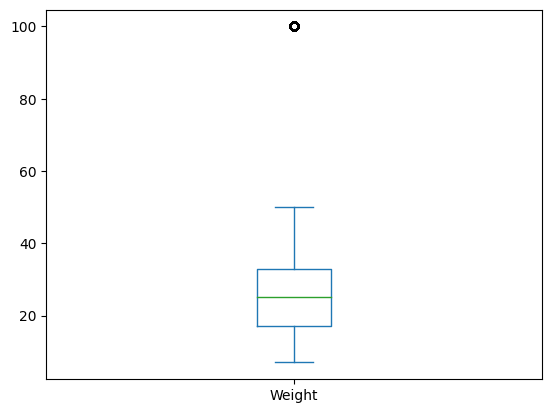

In [46]:
data.Weight.plot(kind='box')

In [37]:
mean = 0
std_dev = 1
num_samples = 1000
data = np.random.normal(mean, std_dev, num_samples)

# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Create a histogram with plotly
fig = px.histogram(df, x='Value', nbins=30, title='Normal Distribution',
                   labels={'Value': 'Value'},
                   marginal='rug', # Adds a rug plot
                   histnorm='density') # Normalizes the histogram

# Add the theoretical normal distribution curve
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = (1 / (std_dev * np.sqrt(2 * np.math.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
df_curve = pd.DataFrame({'x': x, 'y': y})

fig.add_traces(px.line(df_curve, x='x', y='y').data)

# Show the plot
fig.show()

In [38]:
grouped = data.groupby(['Customer', 'KPI Source'])

def calculate_stats(group):
    return pd.Series({
        'mean': group['Score'].mean(),
        'median': group['Score'].median(),
        'mode': group['Score'].mode().iloc[0] if not group['Score'].mode().empty else np.nan,
        'quartile_1': group['Score'].quantile(0.25),
        'quartile_2': group['Score'].quantile(0.5),
        'quartile_3': group['Score'].quantile(0.75),
        'min': group['Score'].min(),
        'max': group['Score'].max()
    })

result = grouped.apply(calculate_stats).reset_index()

result = grouped.apply(calculate_stats).reset_index()

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [ ]:
result

,Customer,KPI Source,mean,median,mode,quartile_1,quartile_2,quartile_3,min,max
0,Converge TP,Access Point Availability,15.000000,20.000000,20.000000,15.000000,20.000000,20.000000,0.000000,20.0
1,Converge TP,Active Detections Crowdstrike,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
2,Converge TP,Active Directory Risk Score,76.271186,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
3,Converge TP,Active Incidents Sentinel,87.121212,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
4,Converge TP,Applications Service Management,97.060606,99.333333,100.000000,93.333333,99.333333,100.000000,73.333333,100.0
...,...,...,...,...,...,...,...,...,...,...
191,UG2,Servers OP Performance,10.655738,11.111111,11.111111,11.111111,11.111111,11.111111,0.000000,75.0
192,UG2,Service Desk numbers,69.756155,75.000000,76.250000,58.854167,75.000000,80.156250,33.333333,100.0
193,UG2,Survey's score,5.202703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
194,UG2,Ticket Age,76.922348,75.000000,75.000000,75.000000,75.000000,80.000000,65.000000,85.0


In [ ]:
sampled_df = result.groupby(['Customer']).apply(lambda x: x.sample(n=3, replace=True)).reset_index(drop=True)

In [ ]:
sampled_df

,Customer,KPI Source,mean,median,mode,quartile_1,quartile_2,quartile_3,min,max
0,Converge TP,Servers OP Availability,10.491803,11.111111,11.111111,11.111111,11.111111,11.111111,0.00,70.00
1,Converge TP,Response Time +60m,7.288374,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,100.00
2,Converge TP,Azure Security Events,88.139205,87.500000,87.500000,87.500000,87.500000,87.500000,87.50,93.75
3,Lummus Technology Inc,Weighted P3 Tickets for Accounting Business Pr...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.00
4,Lummus Technology Inc,Utilization Switch,84.201705,83.250000,83.250000,83.250000,83.250000,83.250000,83.25,100.00
5,Lummus Technology Inc,Managed Answered Surveys Percentage Weekly,14.910934,9.090909,0.000000,0.000000,9.090909,30.397727,0.00,100.00
6,UG2,Applications Service Management,97.507576,100.000000,100.000000,93.333333,100.000000,100.000000,88.00,100.00
7,UG2,Abandonment Rate Daily,93.181818,100.000000,100.000000,100.000000,100.000000,100.000000,0.00,100.00
8,UG2,Answering Speed Time Daily,82.045455,100.000000,100.000000,100.000000,100.000000,100.000000,0.00,100.00


In [ ]:
fig_mean = px.bar(sampled_df, x='Customer', y='mean', color='KPI Source', barmode='group',
                  title='Mean Score by Customer and KPI Source')
fig_mean.show()

In [ ]:
fig_median = px.bar(sampled_df, x='Customer', y='median', color='KPI Source', barmode='group',
                    title='Median Score by Customer and KPI Source')
fig_median.show()

In [ ]:
fig_mode = px.bar(sampled_df, x='Customer', y='mode', color='KPI Source', barmode='group',
                  title='Mode Score by Customer and KPI Source')
fig_mode.show()

In [ ]:
sampled_df[['Customer','KPI Source']]

,Customer,KPI Source
0,Converge TP,Detection Quality Weekly
1,Converge TP,Satisfied and Dissatisfied Surveys
2,Converge TP,CrowdScore
3,Lummus Technology Inc,Weighted P4 Tickets for Sales Business Process
4,Lummus Technology Inc,Utilization Router
5,Lummus Technology Inc,Weighted P1 Tickets for Quality Management Bus...
6,UG2,Azure Advisor Security Score
7,UG2,Handle Time
8,UG2,Infrastructure availability


In [ ]:
data.head()

,Timestamp,ID,Customer,Category,Subcategory,Weight,Score,KPI Source,Subcategory sequence,Subcategory sequence.1,Added by,Index Type
0,2024-06-27 01:34:12,__export__.msp_dragonfly_scoreentry_64708_2e45...,Lummus Technology Inc,Business Processes,Service,25.0,100.0,Weighted P4 Tickets for Service Business Process,6,6,cdataconnector | ExactlyIT Inc,converge
1,2024-06-27 01:34:10,__export__.msp_dragonfly_scoreentry_64707_f636...,Lummus Technology Inc,Business Processes,Service,25.0,100.0,Weighted P3 Tickets for Service Business Process,6,6,cdataconnector | ExactlyIT Inc,converge
2,2024-06-27 01:34:09,__export__.msp_dragonfly_scoreentry_64706_94bb...,Lummus Technology Inc,Business Processes,Service,25.0,100.0,Weighted P2 Tickets for Service Business Process,6,6,cdataconnector | ExactlyIT Inc,converge
3,2024-06-27 01:34:03,__export__.msp_dragonfly_scoreentry_64705_85bc...,Lummus Technology Inc,Business Processes,Delivery,25.0,100.0,Weighted P1 Tickets for Delivery Business Process,5,5,cdataconnector | ExactlyIT Inc,converge
4,2024-06-27 01:33:57,__export__.msp_dragonfly_scoreentry_64704_490b...,Lummus Technology Inc,Business Processes,Quality Management,25.0,100.0,Weighted P4 Tickets for Quality Management Bus...,8,8,cdataconnector | ExactlyIT Inc,converge


In [44]:
# Define the customers and KPI sources to filter
customers_kpi_sources = [
    {'Customer': 'Converge TP', 'KPI Source': 'Detection Quality Weekly'},
    {'Customer': 'Converge TP', 'KPI Source': 'Satisfied and Dissatisfied Surveys'},
    {'Customer': 'Converge TP', 'KPI Source': 'CrowdScore'},
    {'Customer': 'Lummus Technology Inc', 'KPI Source': 'Detection Quality Weekly'},
    {'Customer': 'Lummus Technology Inc', 'KPI Source': 'Satisfied and Dissatisfied Surveys'},
    {'Customer': 'Lummus Technology Inc', 'KPI Source': 'CrowdScore'},
    {'Customer': 'UG2', 'KPI Source': 'Detection Quality Weekly'},
    {'Customer': 'UG2', 'KPI Source': 'Satisfied and Dissatisfied Surveys'},
    {'Customer': 'UG2', 'KPI Source': 'CrowdScore'}
]

# Convert to DataFrame
customers_kpi_df = pd.DataFrame(customers_kpi_sources)

# Merge to filter the main DataFrame
filtered_df = data.merge(customers_kpi_df, on=['Customer', 'KPI Source'], how='inner')


In [45]:
fig = px.box(filtered_df, x='Customer', y='Score', color='KPI Source',
             title='Score Distribution by Customer and KPI Source',
             labels={'Score': 'Score', 'Customer': 'Customer'},
             category_orders={'Customer': filtered_df['Customer'].unique(), 'KPI Source': filtered_df['KPI Source'].unique()})

# Show the plot
fig.show()